In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv("headlines.csv" , header=None)

In [3]:
df.shape

(2225, 1)

In [4]:
print(df.iloc[1,:].values[0])

Army chiefs in regiments decision
 
 Military chiefs are expected to meet to make a final decision on the future of Scotland's Army regiments.
 
 A committee of the Army Board, which is made up of the most senior defence figures, will discuss plans for restructuring regiments on Monday. The proposals include cutting Scotland's six single-battalion regiments to five and merging these into a super regiment. The plans have faced stiff opposition from campaigners and politicians alike. The committee's decision must be ratified by Defence Secretary Geoff Hoon and Prime Minister Tony Blair. It is expected that it will be made public next week. When ministers announced a reorganisation of the Army it drew a question mark over the futures of the Black Watch, the Kings Own Scottish Borderers, the Royal Scots, the Royal Highland Fusiliers and the Argyll and Sutherland Highlanders. In October, the Council of Scottish Colonels proposed the merger of the Royal Scots and the King's Own Scottish Bord

In [11]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

In [12]:
swords = stopwords.words('english')
wnl = WordNetLemmatizer()

In [9]:
sent = 'Hello friends! How are you? I like Python Programming.'

In [29]:
def lemmatize(word):
    tag = pos_tag([word])
    pos = 'n'
    if tag[0][1].startswith('N'):
        pos = 'n'
    elif tag[0][1].startswith('V'):
        pos = 'v'
    elif tag[0][1].startswith('R'):
        pos = 'r'
    elif tag[0][1].startswith('J'):
        pos = 'a'
    return wnl.lemmatize(word , pos=pos)

In [31]:
lemmatize('playing')

'play'

In [34]:
def clean_text(sent):
    tokens1 = word_tokenize(sent)
    token2 = [token for token in tokens1 if token.isalnum()]
    tokens3 = [token.lower() for token in token2 if token.lower() not in swords]
    tokens4 = [lemmatize(token) for token in tokens3]
    return tokens4

clean_text(sent)


['hello', 'friend', 'like', 'python', 'program']

In [35]:
#TF IDF Vectorizer

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
tf = TfidfVectorizer(analyzer=clean_text)

In [38]:
%%time
x_new = tf.fit_transform(df[0])

CPU times: total: 3min 29s
Wall time: 3min 34s


In [40]:
x_new

<2225x22483 sparse matrix of type '<class 'numpy.float64'>'
	with 319728 stored elements in Compressed Sparse Row format>

In [43]:
## Create the clusters

In [44]:
from sklearn.cluster import KMeans

In [46]:
k = KMeans(random_state=0)

In [47]:
k.fit_predict(x_new)

array([4, 6, 4, ..., 2, 5, 2])

In [48]:
set(k.labels_)

{0, 1, 2, 3, 4, 5, 6, 7}

In [49]:
k.inertia_

2067.4969194117366

In [50]:
### Elbow Method
sse = []
for k in range(1,16):
    k = KMeans(n_clusters=k , random_state=0)
    k.fit_predict(x_new)
    sse.append(k.inertia_)

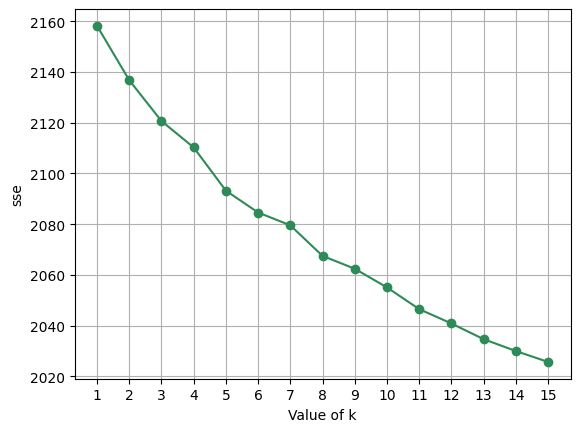

In [54]:
plt.xlabel('Value of k')
plt.ylabel('sse')
plt.grid()
plt.xticks(range(1,16))
plt.plot(range(1,16) , sse , marker = 'o' , color = 'seagreen');

In [85]:
k = KMeans(n_clusters=5, random_state=0 , n_init='auto')

In [86]:
labels = k.fit_predict(x_new)

In [87]:
### Seperate the clusters

In [88]:
((pd.Series(labels)).value_counts(sort=False))

4    281
3    716
0    376
2    521
1    331
Name: count, dtype: int64

In [89]:
zero = df[labels == 0]
one = df[labels == 1]
two = df[labels == 2]
three = df[labels == 3]
four = df[labels == 4]

In [90]:
print('Cluster-0 : ' , len(zero))
print('Cluster-1 : ' , len(one))
print("Cluster-2 : " , len(two))
print("Cluster-3 : " , len(three))
print("Cluster-4 : " , len(four))

Cluster-0 :  376
Cluster-1 :  331
Cluster-2 :  521
Cluster-3 :  716
Cluster-4 :  281


In [91]:
## WordCloud
from wordcloud import WordCloud

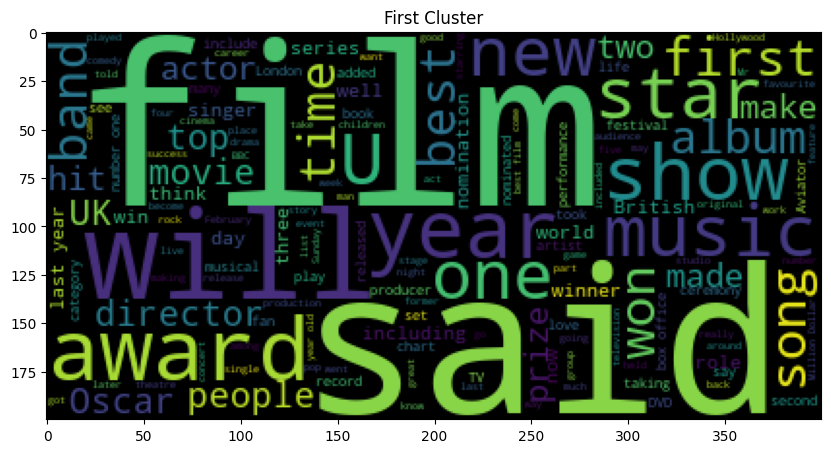

In [92]:
wc = WordCloud().generate(" ".join(one[0]))
plt.figure(figsize=(10,8))
plt.title('First Cluster')
plt.imshow(wc);

In [93]:
swords = stopwords.words('english')

In [94]:
from nltk import FreqDist
new = ' '.join(one[0])
clean = [x for x in word_tokenize(new) if x.lower() not in swords and x.isalpha()]
freq = FreqDist((clean))
freq.most_common(10)

[('film', 669),
 ('said', 621),
 ('best', 575),
 ('also', 337),
 ('year', 319),
 ('music', 289),
 ('show', 261),
 ('one', 250),
 ('US', 246),
 ('first', 212)]

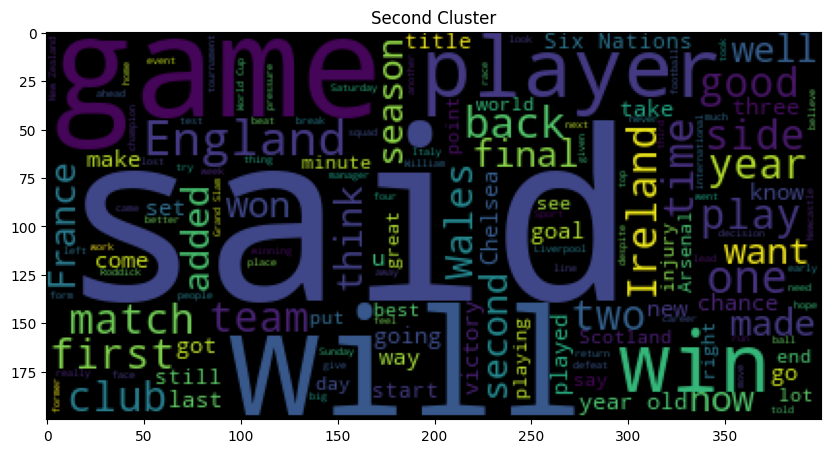

In [95]:
wc = WordCloud().generate(" ".join(two[0]))
plt.figure(figsize=(10,8))
plt.title('Second Cluster')
plt.imshow(wc);

In [96]:
from nltk import FreqDist
new = ' '.join(two[0])
clean = [x for x in word_tokenize(new) if x.lower() not in swords and x.isalpha()]
freq = FreqDist((clean))
freq.most_common(10)

[('said', 963),
 ('game', 520),
 ('England', 465),
 ('first', 440),
 ('would', 422),
 ('win', 412),
 ('last', 370),
 ('one', 344),
 ('also', 343),
 ('two', 342)]

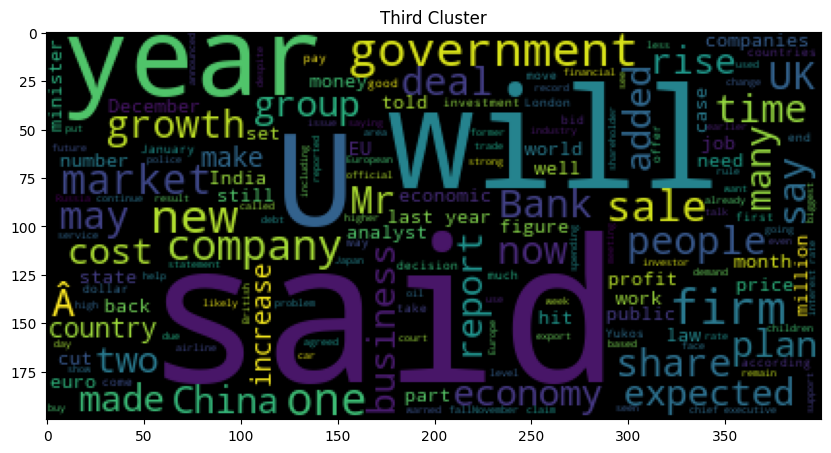

In [97]:
wc = WordCloud().generate(" ".join(three[0]))
plt.figure(figsize=(10,8))
plt.title('Third Cluster')
plt.imshow(wc);

In [98]:
new = ' '.join(three[0])
clean = [x for x in word_tokenize(new) if x.lower() not in swords and x.isalpha()]
freq = FreqDist((clean))
freq.most_common(10)

[('said', 2614),
 ('US', 932),
 ('Mr', 867),
 ('would', 775),
 ('year', 761),
 ('also', 603),
 ('government', 530),
 ('could', 463),
 ('company', 457),
 ('new', 451)]

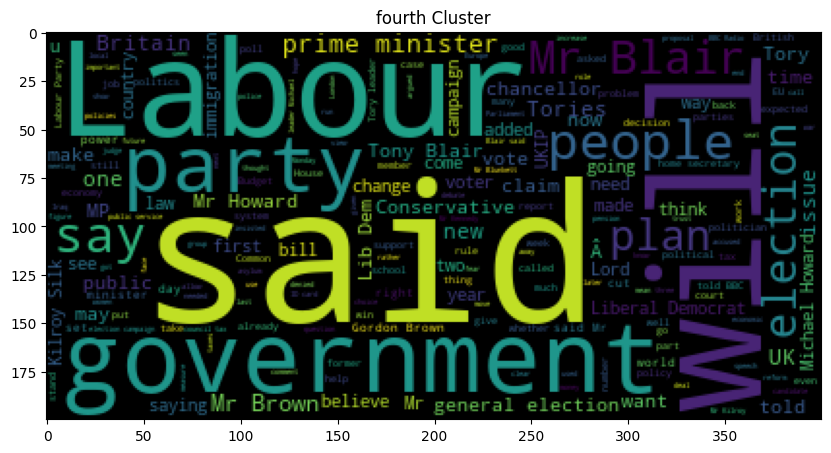

In [99]:
wc = WordCloud().generate(" ".join(four[0]))
plt.figure(figsize=(10,8))
plt.title('fourth Cluster')
plt.imshow(wc);

In [100]:
new = ' '.join(four[0])
clean = [x for x in word_tokenize(new) if x.lower() not in swords and x.isalpha()]
freq = FreqDist((clean))
freq.most_common(10)

[('said', 1528),
 ('Mr', 1485),
 ('would', 814),
 ('Labour', 727),
 ('election', 547),
 ('Blair', 540),
 ('government', 501),
 ('people', 431),
 ('party', 411),
 ('Brown', 375)]

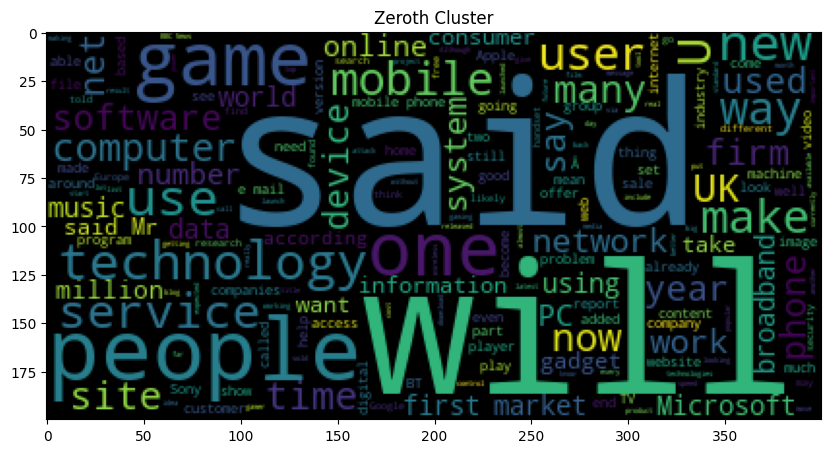

In [101]:
wc = WordCloud().generate(" ".join(zero[0]))
plt.figure(figsize=(10,8))
plt.title('Zeroth Cluster')
plt.imshow(wc);

In [102]:
new = ' '.join(zero[0])
clean = [x for x in word_tokenize(new) if x.lower() not in swords and x.isalpha()]
freq = FreqDist((clean))
freq.most_common(10)

[('said', 1518),
 ('people', 885),
 ('also', 490),
 ('Mr', 475),
 ('technology', 468),
 ('new', 448),
 ('would', 444),
 ('could', 432),
 ('mobile', 423),
 ('music', 417)]